# La EPH

La [Encuesta Permanente de Hogares (EPH)](https://www.indec.gob.ar/indec/web/Institucional-Indec-BasesDeDatos), es una encuesta continua y periódica realizada por el [Instituto Estadísticas y Censos Nacionales (INDEC) de Argentina](https://www.indec.gob.ar). La EPH proporciona información sobre las características sociales, económicas y demográficas de hogares e individuos de 32 aglomerados urbanos de Argentina. La encuesta se realiza trimestralmente en una muestra de aproximadamente 30.000 hogares ubicados en todo el país.

La EPH recopila datos sobre una amplia gama de temas, que incluyen:

* Características del hogar: tamaño, composición, tenencia y acceso a servicios básicos.
* Características individuales: edad, sexo, educación, estado civil, situación laboral e ingresos.
* Ingresos y gastos: ingresos del hogar, ingresos individuales y gastos del hogar.
* Acceso a servicios de salud: seguro médico, uso de servicios preventivos y satisfacción con la atención médica.
* Acceso a la educación: matrícula escolar, tasas de asistencia y logros educativos.
* Condiciones de vivienda: tipo de vivienda, tasas de ocupación y acceso a servici

En esta notebook se toman las encuestas de 2021 y 2022 para construir y analizar una muestra de tipo panel sobre deserción escolar: se seleccionan personas que en un dado trimestre de 2021 se encontrasen estudiando en alguno de los niveles obligatorios del sistema educativo, y que al año siiguiente hayan desertado.

## Cómo acceder a los datos

Para acceder a los datos de la EPH podemos usar el paquete [pyeph](https://pyeph.readthedocs.io/es/latest/) del [Instituto Humai](https://humai.com.ar/), aunque las bases también se pueden [descargar](https://www.indec.gob.ar/indec/web/Institucional-Indec-BasesDeDatos) directamente desde la página del INDEC. El paquete pyeph tiene un módulo llamado `get()` que maneja la descarga e importación de datos en un DataFrame de pandas
### Estructura de la EPH.

Para cada trimestre del año, la EPH cuenta con dos bases de datos distintas:
* __Base de datos de hogares__: recoge información de cada hogar (como número de miembros, ingresos, características edilicias, etc.). *Cada registro de la base de datos/fila del dataframe tiene información de un hogar*.
* __Base de datos de individuos__: recopila información de cada persona que vive en cada hogar (como edad, ingresos, nivel educativo, etc.). *Cada registro de la base de datos/fila del dataframe tiene información de un individuo*os básicos.

In [1]:
import pyeph
import numpy as np
import pandas as pd

In [2]:
# empezamos con el segundo trimestre
hogares21_2 = pyeph.get(data="eph", year=2021, period=2, base_type='hogar')
individuos21_2 = pyeph.get(data="eph", year=2021, period=2, base_type='individual')
hogares22_2 = pyeph.get(data="eph", year=2022, period=2, base_type='hogar')
individuos22_2 = pyeph.get(data="eph", year=2022, period=2, base_type='individual')

100% [............................................................................] 561475 / 561475
Obtenido con exito: base_hogar_2021T2.zip 
100% [..........................................................................] 2195954 / 2195954
Obtenido con exito: base_individual_2021T2.zip 
100% [............................................................................] 704099 / 704099
Obtenido con exito: base_hogar_2022T2.zip 
100% [..........................................................................] 2622089 / 2622089
Obtenido con exito: base_individual_2022T2.zip 


Las bases de datos de hogares (`hogares21_2` y `hogares22_2`) tienen 88 columnas. El INDEC publica periódicamente [documentación](https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_registro_2T2022.pdf) con el diseño del registro y la composición de la estructura de las bases preliminares correspondientes al relevamiento. Este es un resumen de los diferentes campos:

* CODUSU: identificación del lugar de residencia.
* NRO_HOGAR: un ID de la vivienda. Una residencia puede contener más de una vivienda/hogar (es decir, más de una familia puede vivir en el mismo edificio). _Nota: los campos CODUSU y NRO_HOGAR se pueden utilizar para identificar y vincular las bases de datos de hogares e individuos._
* ANO4: año en que se realizó la encuesta.
* TRIMESTRE: trimestre en que se realizó la encuesta.
* REALIZADA: si la encuesta se realizó o no para eso dado CODUSU y NRO_HOGAR
* REGIÓN: región geográfica del lugar de residencia.
* MAS_500: si la aglomeración urbana tiene más de 500.000 habitantes.
* AGLOMERADO: nombre del aglomerado urbano.
* PONDERA: la eph es una encuesta por muestreo, este campo es el factor de ponderación de cada muestra.
* IVn (con n entre 1 y 12): se utiliza para indicar características del lugar donde se habita, como el tipo de edificio (casa, departamento, habitación, etc.), materiales del piso, acceso a agua potable, etc. Columnas con un guión bajo (como IV7_ESP) se utiliza para ampliar la información de la columna anterior (principalmente para preguntas que tienen una opción "otro" como respuesta).
* IIVn (con n entre 1 y 9): se utiliza para indicar características de la vivienda, como número de habitaciones, si hay cocina independiente, etc.
* Vn (con n entre 1 y 19): se utiliza para indicar estrategias y condiciones de vida del hogar, como por ejemplo si los miembros del hogar viven con su salario/ingresos, o si tomaron un préstamo, etc.
* IX_Tot: total de miembros del hogar.
* IX_MEN10: número de socios menores de 10 años.
* IX_MAYEQ10: número de afiliados de 10 o más años.
* ITF: Ingreso total de los hogares en pesos argentinos.
* DECIFR: Decil del ingreso total del hogar para toda la EPH.
* IDECIFR: Decil del ingreso total de los hogares del interior de Argentina.
* RDECIFR: Decil del ingreso total de los hogares de la región.
* GDECIFR: Decil de ingresos totales de los hogares para el conjunto de aglomeraciones de 500.000 o más habitantes.
* PDECIFR: Decil de renta total de los hogares para el conjunto de aglomeraciones de menos de 500.000 habitantes. |
* ADECIFR: Decil del ingreso total de los hogares de la aglomeración.
* IPCF: mide el ingreso per cápita de los hogares en pesos argentinos.
* DECCFR: decil de ingreso per cápita del hogar para toda la EPH.
* IDECCFR: decil de ingreso per cápita de los hogares del interior de Argentina.
* RDECCFR: decil de ingreso per cápita de los hogares de la región.
* GDECCFR: decil de renta per cápita de los hogares para el conjunto de aglomeraciones de 500.000 o más habitantes.
* PDECCFR: decil de renta per cápita de los hogares para el conjunto de aglomeraciones de menos de 500.000 habitantes.
* ADECCFR: decil de ingreso per cápita de los hogares de la aglomeración.
* PONDIH; el factor de ponderación del ingreso del hogar y el ingreso per cápita.

In [4]:
hogares21_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15620 entries, 0 to 15619
Data columns (total 88 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CODUSU      15620 non-null  object 
 1   ANO4        15620 non-null  int64  
 2   TRIMESTRE   15620 non-null  int64  
 3   NRO_HOGAR   15620 non-null  int64  
 4   REALIZADA   15620 non-null  int64  
 5   REGION      15620 non-null  int64  
 6   MAS_500     15620 non-null  object 
 7   AGLOMERADO  15620 non-null  int64  
 8   PONDERA     15620 non-null  int64  
 9   IV1         15620 non-null  int64  
 10  IV1_ESP     21 non-null     object 
 11  IV2         15620 non-null  int64  
 12  IV3         15620 non-null  int64  
 13  IV3_ESP     25 non-null     object 
 14  IV4         15620 non-null  int64  
 15  IV5         15620 non-null  int64  
 16  IV6         15620 non-null  int64  
 17  IV7         15620 non-null  int64  
 18  IV7_ESP     11 non-null     object 
 19  IV8         15620 non-nul

Las bases de datos de individuos (`individuos21_2` y `individuos22_2`) tienen 177 columnas. Algunas de las primeras son las mismas que la base de datos de hogares (CODUSU, NRO_HOGAR, REGION, etc.). Después de eso, tenemos:

* CH01 a CH16_COD: estas son algunas características clave de las personas involucradas, como por ejemplo si aportan el ingreso principal del hogar, su sexo, edad, nivel educativo, etc.
* ESTADO: si la persona tiene trabajo, es inactiva o tiene menos de 10 años.
* CAT_OCUP: se utiliza para indicar el tipo de trabajo de la persona (jefe, particular, empleado, trabajador familiar sin remuneración).
* CAT_INAC: para personas inactivas, si son jubiladas, estudiantes, menores de 6 años, etc.
* PP02C1 a PP11T: se refiere a características del trabajo (o falta de) de la persona.
* P21: importe de la renta principal.
* DECOCUR: decil del ingreso principal para toda la EPH.
* IDECOCUR: decil de los ingresos totales del interior de la EPH.
* RDECOCUR: decil del ingreso total de la región geográfica.
* GDECOCUR: decil del ingreso total para el conjunto de aglomerados de 500.000 o más habitantes.
* PDECOCUR: decil del ingreso total para el conjunto de aglomeraciones menores a 500.000 habitantes.
* ADECOCUR: decil de ingresos principales del aglomerado.
* PONDIIO: factor de ponderación de la renta principal.
* P47T: ingreso individual total.
* DECINDR: decil del ingreso individual total para toda la EPH
* IDECINDR: decil del ingreso individual total del interior de Argentina.
* RDECINDR: decil del ingreso individual total de la región.
* GDECINDR: decil del ingreso individual total para el conjunto de aglomeraciones de 500.000 o más habitantes.
* PDECINDR: decil del ingreso individual total para el conjunto de aglomeraciones de menos de 500.000 habitantes.
* ADECINDR: decil del ingreso individual total del aglomerado.
* PONDII: factor de ponderación del ingreso individual total.

In [5]:
individuos21_2.columns.values

array(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15',
       'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA', 'CH03', 'CH04',
       'CH05', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12',
       'CH13', 'CH14', 'CH15', 'CH15_COD', 'CH16', 'CH16_COD', 'NIVEL_ED',
       'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'IMPUTA', 'PP02C1', 'PP02C2',
       'PP02C3', 'PP02C4', 'PP02C5', 'PP02C6', 'PP02C7', 'PP02C8',
       'PP02E', 'PP02H', 'PP02I', 'PP03C', 'PP03D', 'PP3E_TOT',
       'PP3F_TOT', 'PP03G', 'PP03H', 'PP03I', 'PP03J', 'INTENSI', 'PP04A',
       'PP04B_COD', 'PP04B1', 'PP04B2', 'PP04B3_MES', 'PP04B3_ANO',
       'PP04B3_DIA', 'PP04C', 'PP04C99', 'PP04D_COD', 'PP04G',
       'PP05B2_MES', 'PP05B2_ANO', 'PP05B2_DIA', 'PP05C_1', 'PP05C_2',
       'PP05C_3', 'PP05E', 'PP05F', 'PP05H', 'PP06A', 'PP06C', 'PP06D',
       'PP06E', 'PP06H', 'PP07A', 'PP07C', 'PP07D', 'PP07E', 'PP07F1',
       'PP07F2', 'PP07F3', 'PP07F4', 'PP07F5', 'PP07G1', 'PP07G2',
       'PP07G3', 'PP07G4

In [6]:
individuos21_2.columns.shape

(177,)

La EPH sigue una estructura llamada 2-2-2:
* Un hogar es entrevistado durante dos trimestres consecutivos.
* Ese hogar se retira de la muestra por dos trimestres.
* El mismo hogar vuelve a entrevistarse dos trimestres consecutivos.

De esta forma, la EPH permite hacer seguimientos longitudinales (de panel) de los integrandes de un mismo hogar en un período de un año y medio. Por las características de la muestra, existe un cierto solapamiento entre los trimestres de cada año y del año siguiente:
* Entre un trimestre y el siguiente, hay un 50% de encuestados en común.
* Entre un trimestre y otro, con un trimestre en el medio, no hay encuestados en común.
* Entre un trimestre y otro, con dos trimestres en el medio, hay un 25% de encuestados en común.
* Entre un trimestre y el mismo trimestre del año siguiente, hay un 50% de encuestados en común.



## Análisis

La educación obligatoria en Argentina comprende 14 años consecutivos a partir de los 4 años: los dos últimos años del Nivel Inicial, el Nivel Primario (de 6 a 7 años según la jusrisdicción) y el Nivel Secundario (de 5 o 6 años dependiendo de la longitud del Nivel Primario). El país cuenta con una cobertura casi universal del Nivel Primario, con tasas de asistencia que se sitúan alrededor del 99%. En el Nivel Secundario la cobertura de la población de entre 12 y 19 años es casi universal en el Ciclo Básico (primeros dos años) y llega al 91% en el Ciclo Orientado. Sin embargo, aproximadamente el 20% de los jóvenes y adultos de entre 18 y 24 años no ha completado sus estudios obligatorios.oLas columnas denominadas CH10 a 16 y NIVEL_ED de la base de datos de individuos tienen información sobre educación y antecedentes migratorios. Por otro lado, las columnas CH03 a 09 tienen información personal como estado parental, edad, sexo, etc. Esta es una lista detallada de la información y valores de cada característica:

* CH03: parentesco con el jefe de hogar (jefe, cónyuge/pareja, hijo, etc.).
* CH04: género (masculino, femenino).
* CH05: fecha de nacimiento (día, mes y año).
* CH06: edad.
* CH07: estado civil (casado, divorciado, soltero, etc.).
* CH08: tipo de cobertura médica.
* CH09: alfabetización.
* CH10: Asistencia educativa (Sí; No, pero asisti.ó; Nunca)
* CH11: Tipo de escuela (Pública, Privada, De.sconocida)
* CH12: Nivel educativo más alto (Kindergarten, Primaria, Secund.aria, etc.)
* CH13: Finalización del nivel más alto (Sí, No, .Desconocido)
* CH14: Último año completado (Ninguno, Primero, S.egundo, etc.)
* CH15: Lugar de nacimiento (Esta localidad, Otra localidad, Provincia, País limítrofe, Otro país., Desconocido)
* CH15_Cod: Código específico para nacimiento no local (Provincia, País limítr.ofe, Otro país)
* CH16: Residencia hace 5 años (Esta localidad, Otra localidad, Provincia, País limítrofe, Otro país, No naci.do, Desconocido)
* CH16_Cod: Código específico de residencia no local hace 5 años (Provincia, País limí.trofe, Otro país)
* NIVEL_ED: Nivel educativo general (Primaria Incompleta, Primaria completa, Sec, etc.).
Incompleta, etc.)
a.

Tomando eso en cuenta, construiremos un dataframe tomando los datos de las personas que hayan contestado estar estudiando durante el 2021, pero ya no lo hacen en 2022 y no hayan terminado su escolaridad obligatoria.

In [36]:
cols = ['CODUSU', 'NRO_HOGAR', 'COMPONENTE', 'CH06', 'CH10', 'NIVEL_ED']
# uno los dataframes por CODUSU, NRO_HOGAR y COMPONENTE
_data = pd.merge(left=individuos21_2[cols],
                      right=individuos22_2[cols],
                      how='inner',
                      on=['CODUSU', 'NRO_HOGAR', 'COMPONENTE'],
                      suffixes=('_21', '_22'))

cond_edad = 'CH06_21 >= 4' # inicio de la educación obligatoria
cond_asistencia = 'CH10_21 == 1' # asiste a la escuela
cond_desercion = 'CH10_22 == 2' # asistió a la escuela, pero ya no lo hace
cond_nivel = 'NIVEL_ED_22 <= 3' # educación secundaria incompleta

estudiantes21_2 = _data.query(f'{cond_edad} & {cond_asistencia} & {cond_nivel}')
desertados22_2 = _data.query(f'{cond_edad} & {cond_asistencia} & {cond_desercion} & {cond_nivel}')

In [38]:
desertados22_2

,CODUSU,NRO_HOGAR,COMPONENTE,CH06_21,CH10_21,NIVEL_ED_21,CH06_22,CH10_22,NIVEL_ED_22
69,TQRMNOPRRHMMKTCDEGKDB00700601,1,5,21,1,1,23,2,1
306,TQRMNOQXQHLLLQCDEHPJB00707377,1,2,37,1,3,38,2,2
429,TQRMNOQSPHLOLPCDEHNHB00707782,1,3,20,1,3,21,2,3
511,TQRMNORRUHLOLSCDEGJBF00707686,1,3,20,1,3,21,2,3
512,TQRMNORRUHLOLSCDEGJBF00707686,1,4,16,1,3,17,2,3
...,...,...,...,...,...,...,...,...,...
16728,TQRMNORRXHLOLLCDEIOAH00707206,1,3,18,1,3,19,2,3
17049,TQRMNOQRUHMNLOCDEHMHF00700519,1,4,15,1,3,17,2,3
17207,TQRMNOPQYHMMKQCDEIGED00702112,1,3,16,1,3,17,2,1
17218,TQRMNORXVHMMKUCDEHPJB00700357,1,4,30,1,3,30,2,3


In [39]:
print(f'El porcentaje de desertores medido entre el segundo trimestre 2021 y el segundo trimestre de 2022 es {desertados22_2.shape[0]/estudiantes21_2.shape[0]:1.2%}.')

El porcentaje de desertores medido entre el segundo trimestre 2021 y el segundo trimestre de 2022 es 3.96%.


Por las características de la muestra, la cantidad de personas que dejan el sistema educativo es muy baja entre un único trimestre de un año y el próximo del año siguiente. Por lo tanto, para la construcción del dataset a utilizar en el proyecto, deberemos utilizar datos de distintos años y trimestres (ej.: segundo, tercero y cuarto de dos años consecutivos).

Veamos la distribución por edad de estas personas.

In [41]:
desertados22_2[['CH06_21', 'CH06_22']].describe()

,CH06_21,CH06_22
count,140.000000,140.000000
mean,24.750000,27.235714
std,13.341731,15.084706
min,7.000000,8.000000
25%,18.000000,19.000000
50%,20.000000,21.500000
75%,27.000000,29.000000
max,88.000000,89.000000


In [42]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", palette="pastel")
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

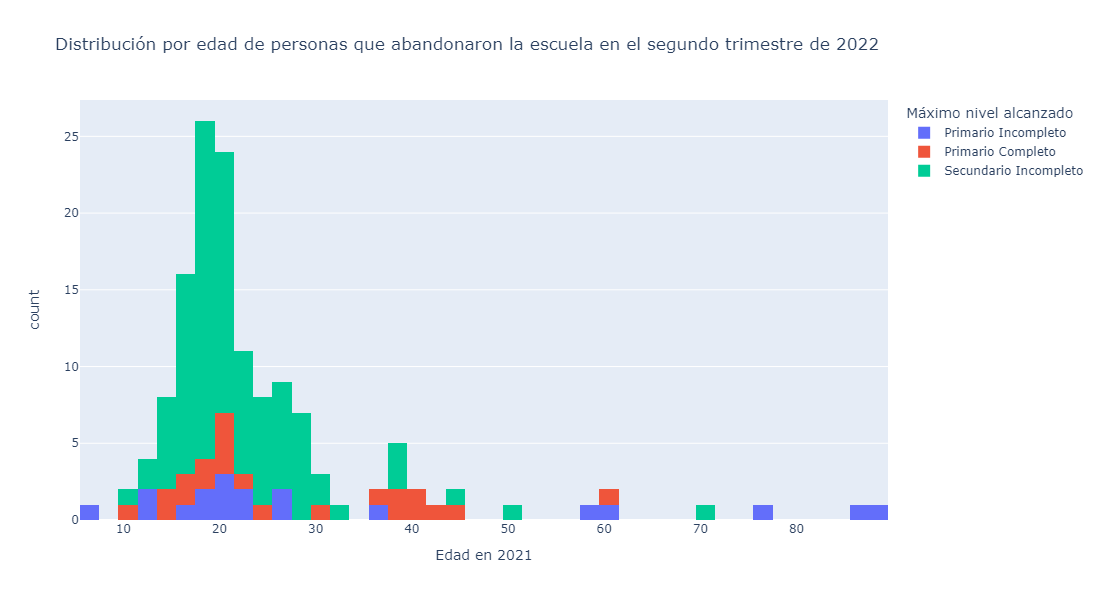

In [60]:
fig = px.histogram(data_frame=desertados22_2, x='CH06_21', color='NIVEL_ED_22',
                  labels={'CH06_21': 'Edad en 2021',
                          'Count': 'Frecuencia',
                         'NIVEL_ED_22': 'Máximo nivel alcanzado'}, 
                   nbins=50,
                   title='Distribución por edad de personas que abandonaron la escuela en el segundo trimestre de 2022',
                   height=600)

newnames = {'1':'Primario Incompleto', '2': 'Primario Completo', '3': 'Secundario Incompleto'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )
fig.show()

La mayoría de las personas que abandonaron sus estudios obligatorios tenían en 2021 más de 15 años, con el pico encontrándose alrededor de los 18 años (el 25% tienen hasta esa edad). Esto coincide con la información conocida sobre el tema: la mayor deserción escolar se da en el último año de secundaria, a partir de los 17-18 años. 

Para continuar el análisis, vamos a combinar ese dataset de desertados22_2 con algunos datos de las bases de hogares e individuos de 2021. Vamos a mirar los deciles de ingresos, algunos indicadores que correlacionan con bajos deciles de ingresos (ya que muchas personas eligen no contestar las preguntas sobre sus ingresos), el máximo nivel educativo del jefe/a de hogar, si es o no ama de casa y si buscó trabajo en los últimos 12 meses.

## Indicadores de NBI (Necesidades Básicas Insatisfechas) - Pobreza Multidimensional

En base a consideraciones del INDEC, se define que si un hogar cumple con alguna de las siguientes condiciones, entonces tiene Necesidades Básicas Insatisfechas (NBI):

* **Hacinamiento**: más de 3 personas por cuarto para dormir.

    * La columna **II2** de la base de hogares mide el número de cuartos que se utilizan para dormir. La cantidad de personas del hogar dividido este número nos da la cantidad de personas por cuarto de dormir del hogar.

* **Vivienda precaria**: pieza en inquilinato, local no construido para habitación y pieza de hotel o situada en villa de emergencia.

    * Variables **IV1**: Tipo de vivienda (por observación)
        
        1. casa
        2. departamento
        3. pieza de inquilinato
        4. pieza en hotel / pensión
        5. local no construido para habitación

    * La columna **IV12_3** = 1 indica si la vivienda está ubicada en una villa de emergencia.

* **Condiciones sanitarias**: hogares que no tuvieran ningún tipo de retrete.

    - Variable **IV8** = 1 el hogar tiene baño o letrina
    - Variable **IV10** = 1 sin carencia (inodoro con botón / mochila / cadena y arrastre de agua)

* **Asistencia escolar**: Variable **CH10** indica asistencia a algún establecimiento educativo.

* **Capacidad de subsistencia**: hogares que tuvieran 4 o más personas por miembro ocupado, y además cuyo jefe de hogar tuviera baja educación.

    - Variable **estado**: indica condición de actividad económica.
        - 0 = Entrevista individual no realizada (no respuesta al cuestionario individual)
        - 1 = Ocupado
        - 2 = Desocupado
        - 3 = Inactivo
        - 4 = Menor de 10 años

    - Variable **nivel_ed**: indica el nivel educativo.
        - 1 = Primario incompleto (incluye educación especial)
        - 2 = Primario completo
        - 3 = Secundario incompleto
        - 4 = Secundario completo
        - 5 = Superior universitario incompleto
        - 6 = Superior universitario completo
        - 7 = Sin instrucción
        - 9 = Ns/Nr

    - Variable **CH03** indica si la persona es jefe de hogar.